## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('insurance.csv')

## EDA

In [5]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [6]:
df.shape

(1338, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
numeric_col = ['age', 'bmi', 'children', 'charges' ]

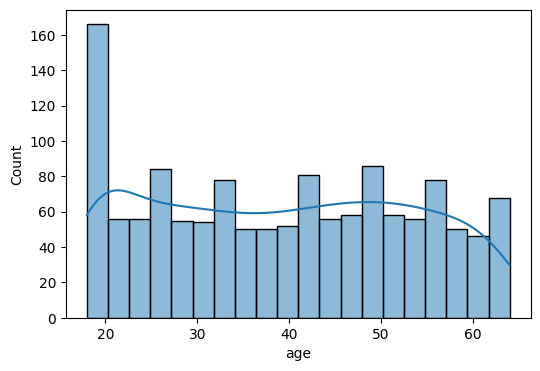

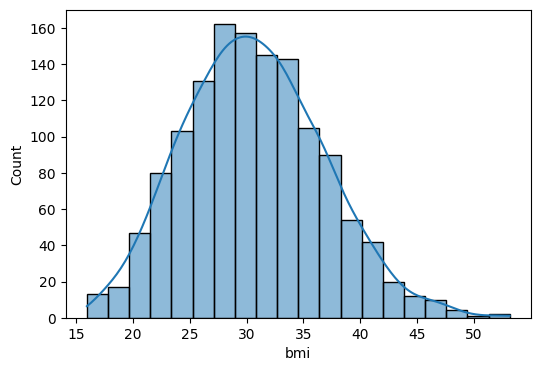

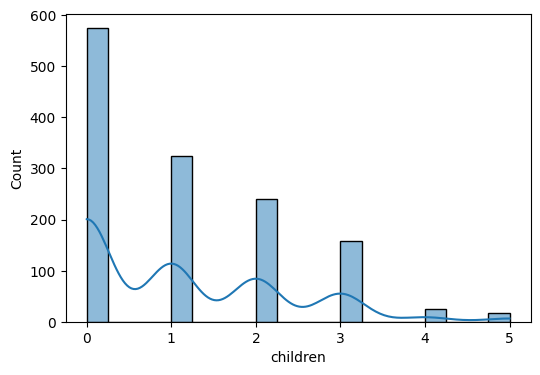

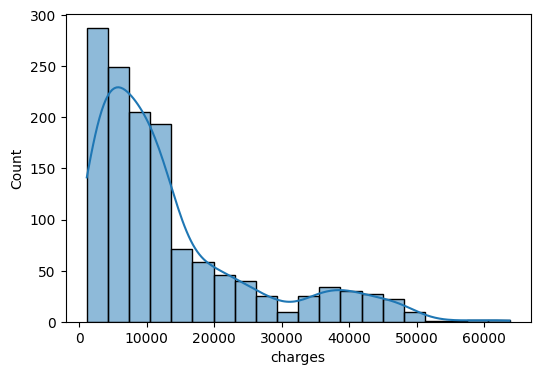

In [11]:
for col in numeric_col:
    plt.figure(figsize = (6,4))
    sns.histplot(df[col], kde = True, bins = 20)

<Axes: xlabel='children', ylabel='count'>

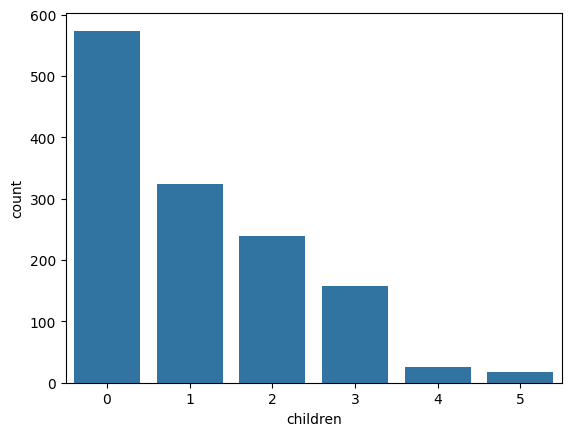

In [12]:
sns.countplot(x = df['children'])

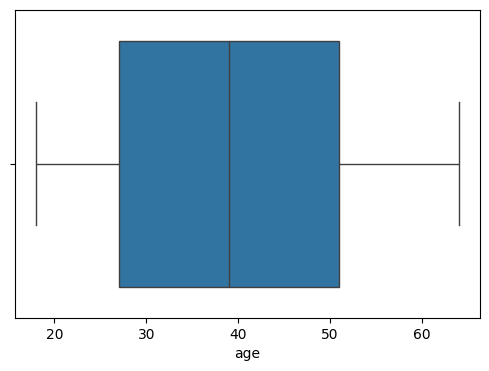

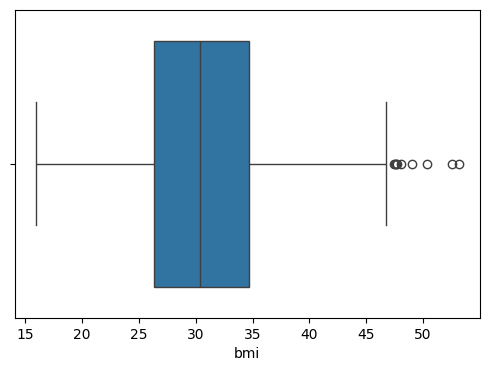

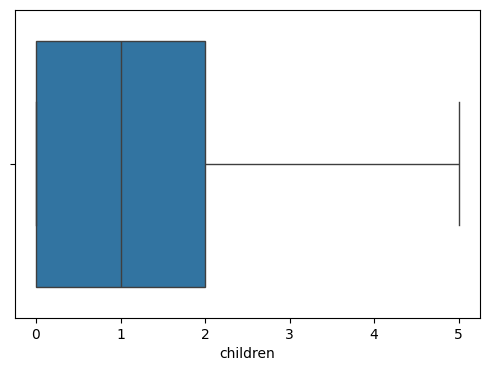

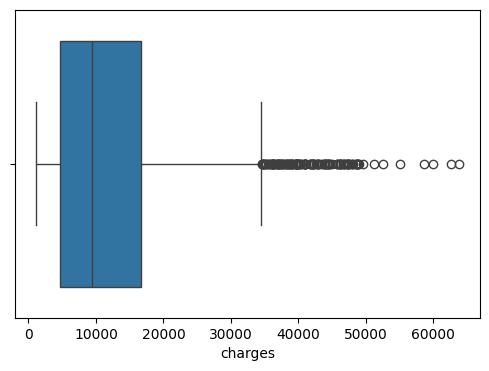

In [13]:
for col in numeric_col:
    plt.figure(figsize = (6,4))
    sns.boxplot(x = df[col])

<Axes: >

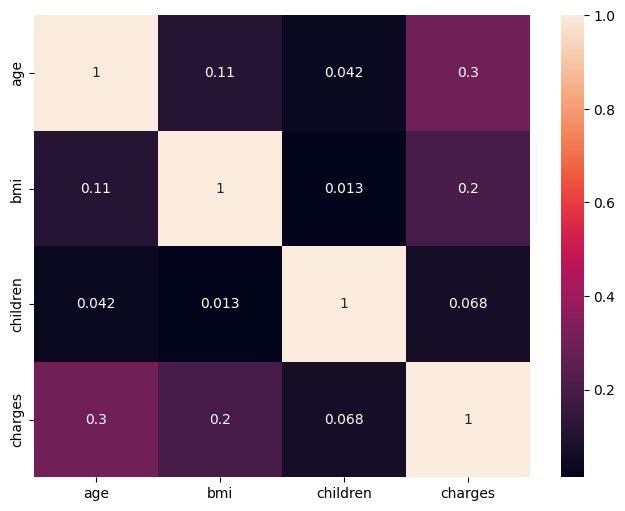

In [14]:
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(numeric_only = True), annot = True)

## Data Cleaning and Preprocessing

In [15]:
df.drop_duplicates(inplace = True)

In [16]:
df.shape

(1337, 7)

In [17]:
df['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [19]:
df.rename(columns={
    "sex":"gender",
    "smoker":"bad_habit"
}, inplace=True)

In [20]:
df.head()

age  gender     bmi  children bad_habit     region      charges
0   19  female  27.900         0       yes  southwest  16884.92400
1   18    male  33.770         1        no  southeast   1725.55230
2   28    male  33.000         3        no  southeast   4449.46200
3   33    male  22.705         0        no  northwest  21984.47061
4   32    male  28.880         0        no  northwest   3866.85520

## Feature Engineering and Extraction

<Axes: xlabel='bmi', ylabel='Count'>

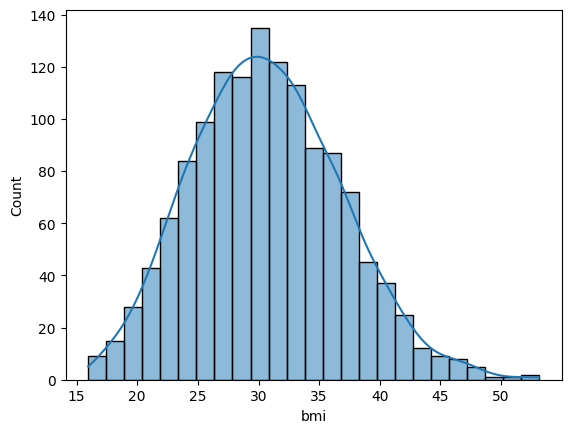

In [22]:
sns.histplot(df['bmi'], kde=True)

In [23]:
df["bmi_category"] = pd.cut(
    df["bmi"],
    bins=[0, 18.5, 24.9, 29.9, float('inf')],
    labels=['UnderWeight', 'Normal', 'Overweight', 'Obese']
)

In [24]:
df.head()

age  gender     bmi  children bad_habit     region      charges  \
0   19  female  27.900         0       yes  southwest  16884.92400   
1   18    male  33.770         1        no  southeast   1725.55230   
2   28    male  33.000         3        no  southeast   4449.46200   
3   33    male  22.705         0        no  northwest  21984.47061   
4   32    male  28.880         0        no  northwest   3866.85520   

  bmi_category  
0   Overweight  
1        Obese  
2        Obese  
3       Normal  
4   Overweight

In [25]:
df["bmi_category"].value_counts()

bmi_category
Obese          715
Overweight     380
Normal         221
UnderWeight     21
Name: count, dtype: int64

(array([380.,   0.,   0., 715.,   0.,   0., 221.,   0.,   0.,  21.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

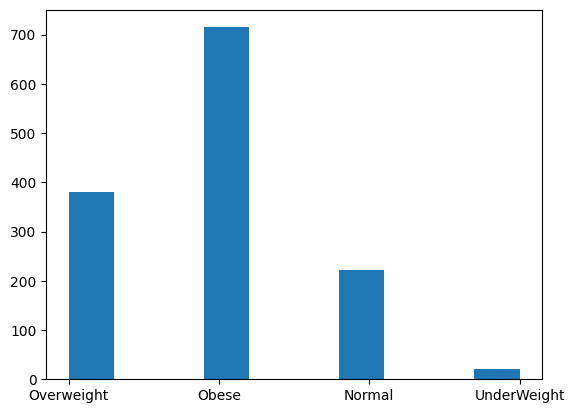

In [26]:
plt.hist(df["bmi_category"])